<a href="https://colab.research.google.com/github/Rajeswari0410/ML_Projects/blob/main/Object_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import required libraries
import time
import os
import pickle
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from skimage.color import rgb2gray
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix
from keras.optimizers import SGD, Adam
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential, Model
from keras.regularizers import l2
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# load the dataset
(X_train_3, y_train), (X_test_3, y_test) = cifar10.load_data()
# X_train_3 and X_test_3 implies that the input images have 3 channels R, G, B.

In [ ]:
# Checking the size & dimension
X_train_3.shape

(50000, 32, 32, 3)

In [ ]:
# Converting from rgb to gray to decrease the training time
X_train = rgb2gray(X_train_3)
X_test = rgb2gray(X_test_3)
X_test.shape

(10000, 32, 32)

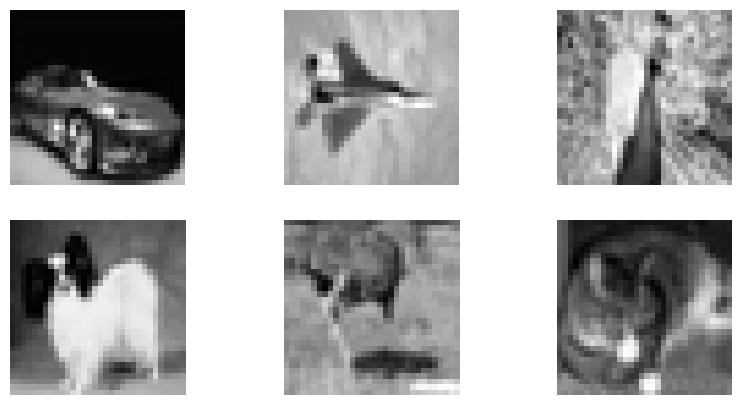

In [ ]:
# Randomly select and visualize 6 images:
def display_images(images, num_images=6):
    plt.figure(figsize=(10, 5))
    indices = random.sample(range(len(images)), num_images)
    for i,index in enumerate(indices):
        image = images[index]
        image_add = np.expand_dims(image, axis=-1)
        image_add = tf.image.per_image_standardization(image_add)
        plt.subplot(2, 3, i + 1)
        plt.imshow(image, cmap='gray')
        plt.axis('off')
    plt.show()

# Display 6 random standardized images
display_images(X_train)

Class 0: 5000 samples
Class 1: 5000 samples
Class 2: 5000 samples
Class 3: 5000 samples
Class 4: 5000 samples
Class 5: 5000 samples
Class 6: 5000 samples
Class 7: 5000 samples
Class 8: 5000 samples
Class 9: 5000 samples


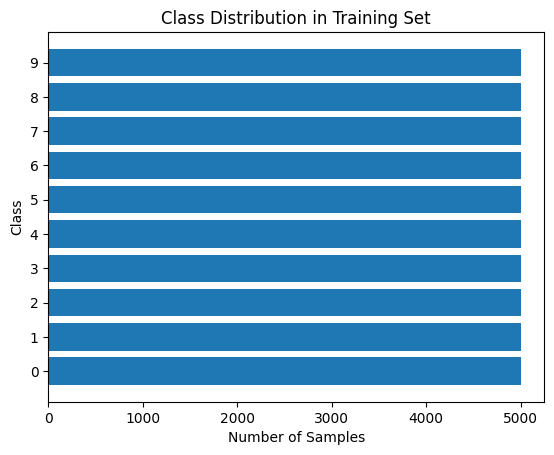

In [ ]:
# Number of samples per class in the training data:
unique_classes, class_counts = np.unique(y_train, return_counts=True)
# Print the counts per class
for class_id, count in zip(unique_classes, class_counts):
    print(f"Class {class_id}: {count} samples")

# Plot the bar graph
plt.barh(unique_classes, class_counts)
plt.yticks(unique_classes)
plt.xlabel('Number of Samples')
plt.ylabel('Class')
plt.title('Class Distribution in Training Set')
plt.show()

# According to the actual dataset, the classes are in the order: {Airplane, Automobile, Bird, Cat, Deer, Dog, Frog, Horse, Ship, Truck}

In [ ]:
# Splitting the data into training and validation
X_train_data, X_val, y_train_data, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
X_val.shape

(10000, 32, 32)

In [ ]:
# Function for plotting loss and accuracy curves
def plot_training_history(history, title):
    # Plot training & validation loss values
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='lower right')

    plt.suptitle(title)
    plt.show()

**FNN**

Epoch 1/10
313/313 [==============================] - 2s 4ms/step - loss: 2.1117 - accuracy: 0.2170 - val_loss: 2.0282 - val_accuracy: 0.2500
Epoch 2/10
313/313 [==============================] - 1s 4ms/step - loss: 1.9693 - accuracy: 0.2850 - val_loss: 1.9396 - val_accuracy: 0.3120
Epoch 3/10
313/313 [==============================] - 2s 6ms/step - loss: 1.9050 - accuracy: 0.3115 - val_loss: 1.9108 - val_accuracy: 0.3213
Epoch 4/10
313/313 [==============================] - 1s 4ms/step - loss: 1.8634 - accuracy: 0.3363 - val_loss: 1.8606 - val_accuracy: 0.3392
Epoch 5/10
313/313 [==============================] - 1s 4ms/step - loss: 1.8256 - accuracy: 0.3465 - val_loss: 1.8380 - val_accuracy: 0.3506
Epoch 6/10
313/313 [==============================] - 1s 4ms/step - loss: 1.7974 - accuracy: 0.3588 - val_loss: 1.8334 - val_accuracy: 0.3424
Epoch 7/10
313/313 [==============================] - 1s 4ms/step - loss: 1.7779 - accuracy: 0.3658 - val_loss: 1.8179 - val_accuracy: 0.3548
Epoch 

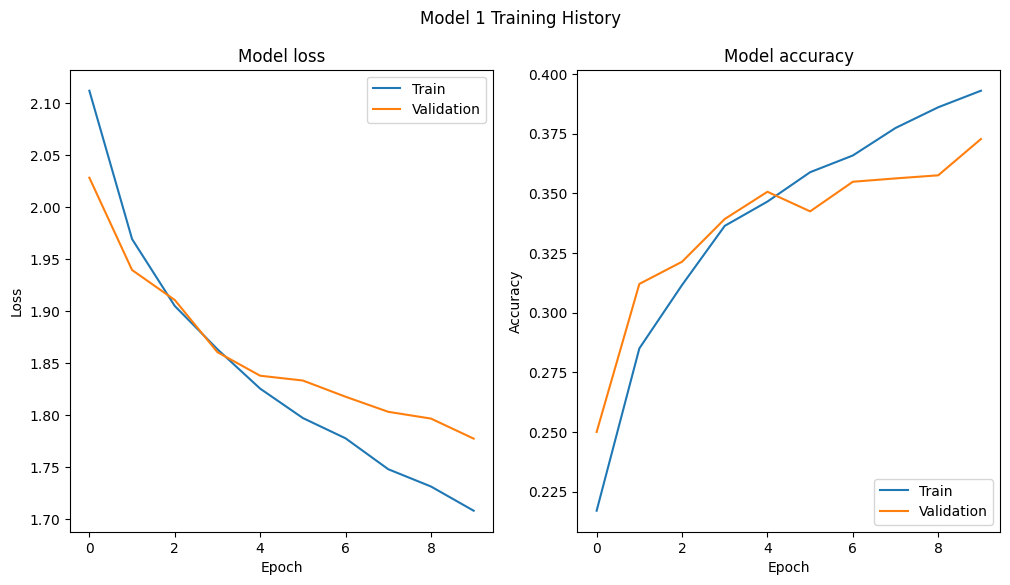

Model 2 Results:
Hyperparameters: {'num_parameters': 306330, 'train_loss': 1.5098412036895752, 'train_accuracy': 0.4631749987602234, 'val_loss': 1.674614429473877, 'val_accuracy': 0.4049000144004822, 'training_time': 41.86693739891052, 'history': <keras.src.callbacks.History object at 0x795e5f1c1c00>}
Train Loss: 1.5098412036895752
Train Accuracy: 0.4631749987602234
Validation Loss: 1.674614429473877
Validation Accuracy: 0.4049000144004822
Training Time: 41.86693739891052 seconds
Number of Parameters: 306330


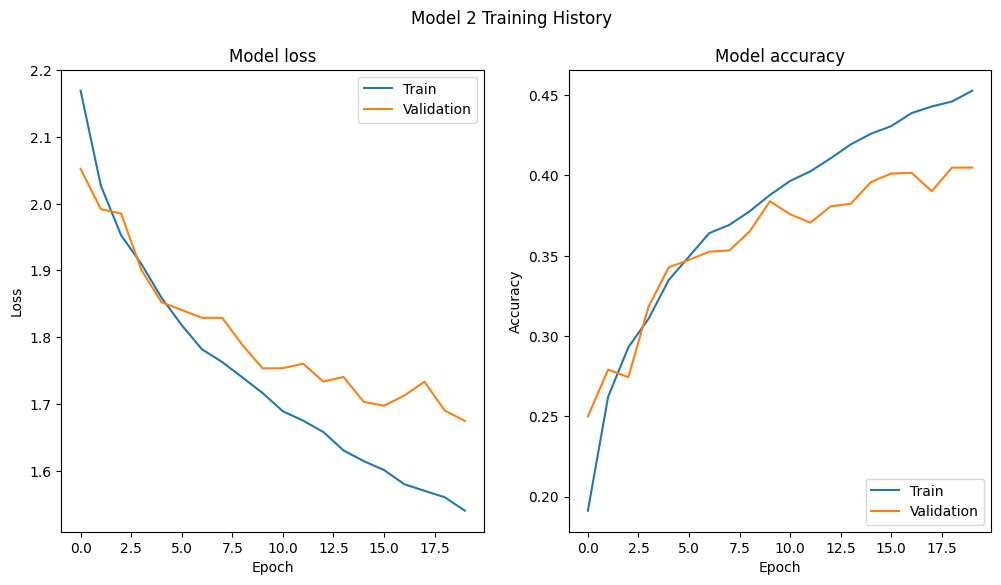

Model 3 Results:
Hyperparameters: {'num_parameters': 140106, 'train_loss': 1.5381805896759033, 'train_accuracy': 0.4555250108242035, 'val_loss': 1.7084017992019653, 'val_accuracy': 0.4034999907016754, 'training_time': 30.180169582366943, 'history': <keras.src.callbacks.History object at 0x795e5c544d00>}
Train Loss: 1.5381805896759033
Train Accuracy: 0.4555250108242035
Validation Loss: 1.7084017992019653
Validation Accuracy: 0.4034999907016754
Training Time: 30.180169582366943 seconds
Number of Parameters: 140106


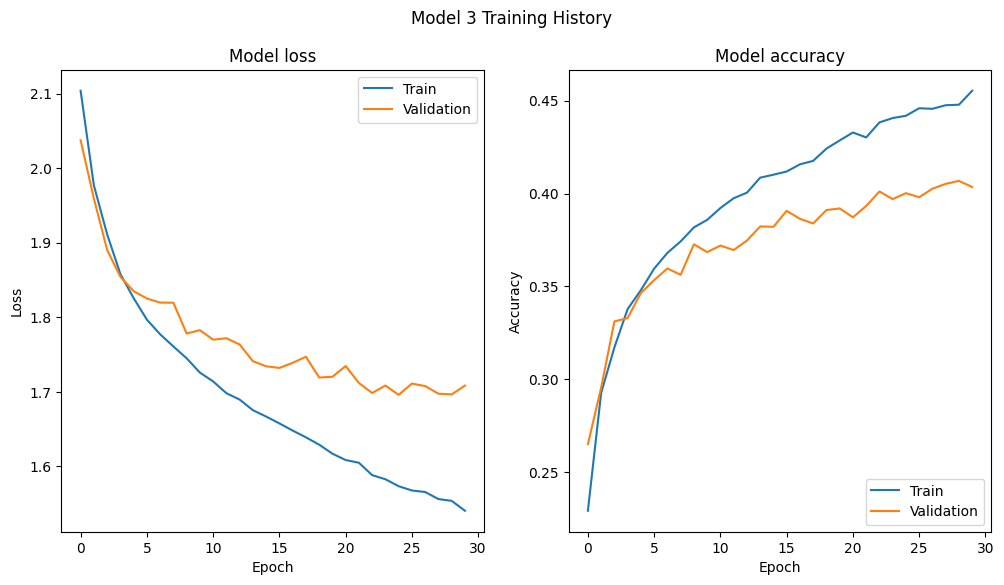

In [ ]:
# Define a common fucntion for FNN models to compile & fit
def train_fnn(model, epochs, batch_size, X_train, y_train, X_val, y_val):
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    start_time = time.time()
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))
    end_time = time.time()
    training_time = end_time - start_time
    num_parameters = model.count_params()
    train_loss, train_accuracy = model.evaluate(X_train, y_train)
    val_loss, val_accuracy = model.evaluate(X_val, y_val)
    return {
        "num_parameters": num_parameters,
        "train_loss": train_loss,
        "train_accuracy": train_accuracy,
        "val_loss": val_loss,
        "val_accuracy": val_accuracy,
        "training_time": training_time,
        "history": history
    }

# Define FNN models with varying hyperparameters
model1 = keras.Sequential()
model1.add(keras.layers.Flatten(input_shape=(32, 32, 1)))
model1.add(keras.layers.Dense(128, activation='relu'))
model1.add(keras.layers.Dense(64, activation='relu'))
model1.add(keras.layers.Dense(32, activation='relu'))
model1.add(keras.layers.Dense(10, activation='softmax'))

model2 = keras.Sequential()
model2.add(keras.layers.Flatten(input_shape=(32, 32, 1)))
model2.add(keras.layers.Dense(256, activation='relu'))
model2.add(keras.layers.Dense(128, activation='relu'))
model2.add(keras.layers.Dense(64, activation='relu'))
model2.add(keras.layers.Dense(32, activation='relu'))
model2.add(keras.layers.Dense(16, activation='relu'))
model2.add(keras.layers.Dense(10, activation='softmax'))

model3 = keras.Sequential()
model3.add(keras.layers.Flatten(input_shape=(32, 32, 1)))
model3.add(keras.layers.Dense(128, activation='relu'))
model3.add(keras.layers.Dense(64, activation='relu'))
model3.add(keras.layers.Dense(10, activation='softmax'))

# Train the models and collect results
results = []

results.append(train_fnn(model1, 10, 128, X_train_data, y_train_data, X_val, y_val))
results.append(train_fnn(model2, 20, 256, X_train_data, y_train_data, X_val, y_val))
results.append(train_fnn(model3, 30, 256, X_train_data, y_train_data, X_val, y_val))

# Display results for all 3 models
for idx, result in enumerate(results):
    print(f"Model {idx + 1} Results:")
    print("Hyperparameters:", result)
    print("Train Loss:", result["train_loss"])
    print("Train Accuracy:", result["train_accuracy"])
    print("Validation Loss:", result["val_loss"])
    print("Validation Accuracy:", result["val_accuracy"])
    print("Training Time:", result["training_time"], "seconds")
    print("Number of Parameters:", result["num_parameters"])
    model_title = f"Model {idx + 1} Training History"
    plot_training_history(result['history'], model_title)

In [ ]:
# Testing with Best model (Model 2)
model2 = keras.Sequential()
model2.add(keras.layers.Flatten(input_shape=(32, 32, 1)))
model2.add(keras.layers.Dense(256, activation='relu'))
model2.add(keras.layers.Dense(128, activation='relu'))
model2.add(keras.layers.Dense(64, activation='relu'))
model2.add(keras.layers.Dense(32, activation='relu'))
model2.add(keras.layers.Dense(16, activation='relu'))
model2.add(keras.layers.Dense(10, activation='softmax'))

# Compile the model
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define a ModelCheckpoint callback to save the best weights during training
checkpoint = ModelCheckpoint('best_model_weights.h5', save_best_only=True)

# Train the model with the checkpoint callback
history = model2.fit(X_train_data, y_train_data, epochs=30, batch_size=256, validation_data=(X_val, y_val), callbacks=[checkpoint])

# Evaluate the model on the testing set
test_loss, test_accuracy = model2.evaluate(X_test, y_test)
print(f"Testing Accuracy (Experiment 3): {test_accuracy}")

Epoch 1/30
157/157 [==============================] - 3s 8ms/step - loss: 2.1369 - accuracy: 0.2055 - val_loss: 2.0569 - val_accuracy: 0.2546
Epoch 2/30
 21/157 [===>..........................] - ETA: 0s - loss: 2.0447 - accuracy: 0.2502

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


157/157 [==============================] - 1s 7ms/step - loss: 1.9962 - accuracy: 0.2780 - val_loss: 1.9615 - val_accuracy: 0.2948
Epoch 3/30
157/157 [==============================] - 1s 6ms/step - loss: 1.9366 - accuracy: 0.3029 - val_loss: 1.9339 - val_accuracy: 0.3132
Epoch 4/30
157/157 [==============================] - 1s 6ms/step - loss: 1.8932 - accuracy: 0.3206 - val_loss: 1.8930 - val_accuracy: 0.3155
Epoch 5/30
157/157 [==============================] - 1s 5ms/step - loss: 1.8545 - accuracy: 0.3325 - val_loss: 1.8772 - val_accuracy: 0.3278
Epoch 6/30
157/157 [==============================] - 1s 5ms/step - loss: 1.8240 - accuracy: 0.3457 - val_loss: 1.8332 - val_accuracy: 0.3433
Epoch 7/30
157/157 [==============================] - 1s 6ms/step - loss: 1.7967 - accuracy: 0.3550 - val_loss: 1.8232 - val_accuracy: 0.3544
Epoch 8/30
157/157 [==============================] - 1s 8ms/step - loss: 1.7714 - accuracy: 0.3650 - val_loss: 1.8109 - val_accuracy: 0.3571
Epoch 9/30
157/15

313/313 [==============================] - 1s 2ms/step


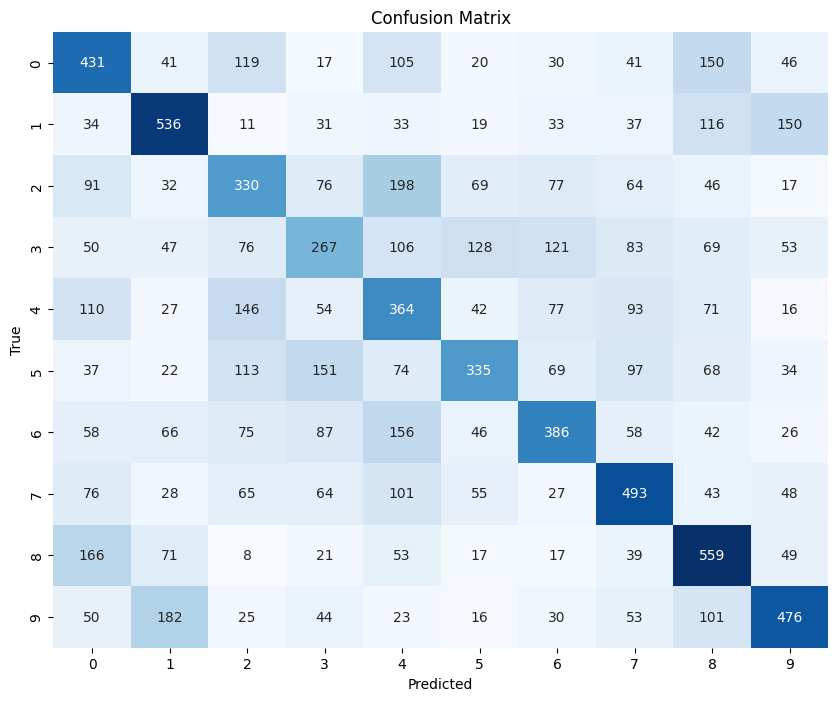

In [ ]:
# Plot Confusion Matrix
y_pred = model2.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**CNN**

Epoch 1/30
625/625 [==============================] - 23s 11ms/step - loss: 2.6887 - accuracy: 0.2816 - val_loss: 1.9270 - val_accuracy: 0.4152
Epoch 2/30
625/625 [==============================] - 6s 10ms/step - loss: 1.8101 - accuracy: 0.4548 - val_loss: 1.6413 - val_accuracy: 0.5132
Epoch 3/30
625/625 [==============================] - 6s 9ms/step - loss: 1.5554 - accuracy: 0.5487 - val_loss: 1.3587 - val_accuracy: 0.6138
Epoch 4/30
625/625 [==============================] - 6s 9ms/step - loss: 1.3790 - accuracy: 0.6075 - val_loss: 1.1964 - val_accuracy: 0.6646
Epoch 5/30
625/625 [==============================] - 7s 11ms/step - loss: 1.2605 - accuracy: 0.6467 - val_loss: 1.1294 - val_accuracy: 0.6850
Epoch 6/30
625/625 [==============================] - 9s 14ms/step - loss: 1.1738 - accuracy: 0.6705 - val_loss: 1.0656 - val_accuracy: 0.7065
Epoch 7/30
625/625 [==============================] - 6s 10ms/step - loss: 1.1147 - accuracy: 0.6894 - val_loss: 1.0571 - val_accuracy: 0.7106


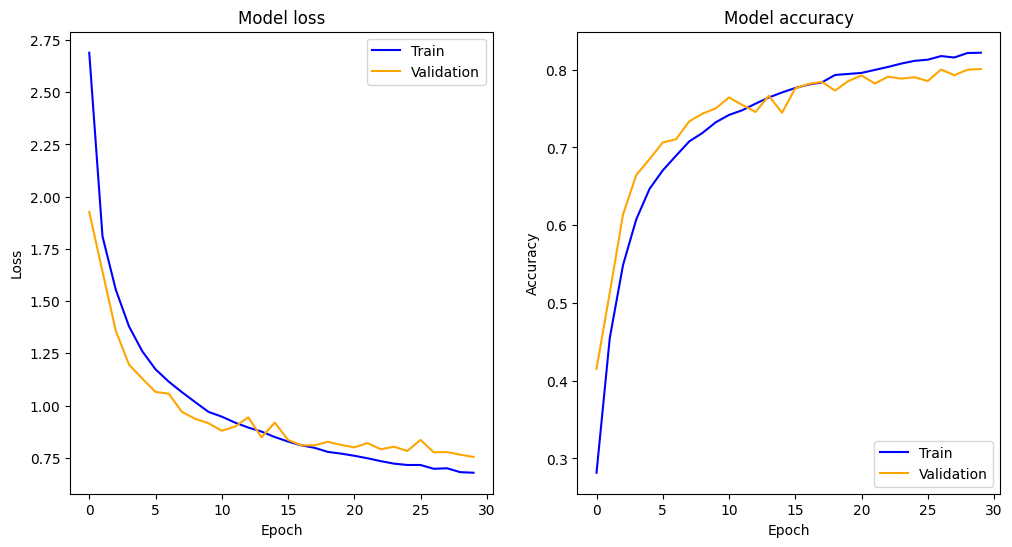

Training Time: 203.18806290626526 seconds
Number of Parameters: 549994
Training Accuracy: 0.8219249844551086, Training Loss: 0.6788604259490967
Validation Accuracy: 0.8008999824523926, Validation Loss: 0.7543368935585022


In [ ]:
# Define cnn model
def define_model1():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 1), kernel_regularizer=l2(0.01)))
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.25))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.25))
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.01)))
  model.add(Dropout(0.25))
  model.add(Dense(10, activation='softmax'))
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model

# Function to plot accuracy and losses
def plot_history(history):
 plt.figure(figsize=(12, 6))
 plt.subplot(1, 2, 1)
 plt.title('Cross Entropy Loss')
 plt.plot(history.history['loss'], color='blue', label='train')
 plt.plot(history.history['val_loss'], color='orange', label='test')
 plt.title('Model loss')
 plt.ylabel('Loss')
 plt.xlabel('Epoch')
 plt.legend(['Train', 'Validation'], loc='upper right')
 # plot accuracy
 plt.subplot(1, 2, 2)
 plt.plot(history.history['accuracy'], color='blue', label='train')
 plt.plot(history.history['val_accuracy'], color='orange', label='test')
 plt.title('Model accuracy')
 plt.ylabel('Accuracy')
 plt.xlabel('Epoch')
 plt.legend(['Train', 'Validation'], loc='lower right')
 plt.show()


model4 = define_model1()
 # fit model
start_time = time.time()
history_cnn1 = model4.fit(X_train_data, y_train_data, epochs=30, batch_size=64, validation_data=(X_val, y_val), verbose=1)
end_time = time.time()
training_time = end_time - start_time
# learning curves
plot_history(history_cnn1)

print(f"Training Time: {training_time} seconds")
print(f"Number of Parameters: {model4.count_params()}")
# Extract training and validation accuracy
train_accuracy = history_cnn1.history['accuracy']
val_accuracy = history_cnn1.history['val_accuracy']

# Extract training and validation loss
train_loss = history_cnn1.history['loss']
val_loss = history_cnn1.history['val_loss']

# Print the last epoch's accuracy and loss
print(f"Training Accuracy: {train_accuracy[-1]}, Training Loss: {train_loss[-1]}")
print(f"Validation Accuracy: {val_accuracy[-1]}, Validation Loss: {val_loss[-1]}")

Epoch 1/25
625/625 [==============================] - 12s 14ms/step - loss: 2.0145 - accuracy: 0.2315 - val_loss: 1.8150 - val_accuracy: 0.3077
Epoch 2/25
625/625 [==============================] - 7s 12ms/step - loss: 1.5849 - accuracy: 0.4157 - val_loss: 1.6179 - val_accuracy: 0.4246
Epoch 3/25
625/625 [==============================] - 8s 12ms/step - loss: 1.3195 - accuracy: 0.5397 - val_loss: 1.0990 - val_accuracy: 0.6181
Epoch 4/25
625/625 [==============================] - 8s 13ms/step - loss: 1.1440 - accuracy: 0.6014 - val_loss: 1.0388 - val_accuracy: 0.6335
Epoch 5/25
625/625 [==============================] - 8s 13ms/step - loss: 1.0306 - accuracy: 0.6463 - val_loss: 0.9089 - val_accuracy: 0.6761
Epoch 6/25
625/625 [==============================] - 8s 12ms/step - loss: 0.9431 - accuracy: 0.6773 - val_loss: 0.8358 - val_accuracy: 0.7114
Epoch 7/25
625/625 [==============================] - 8s 13ms/step - loss: 0.8915 - accuracy: 0.6936 - val_loss: 0.8327 - val_accuracy: 0.716

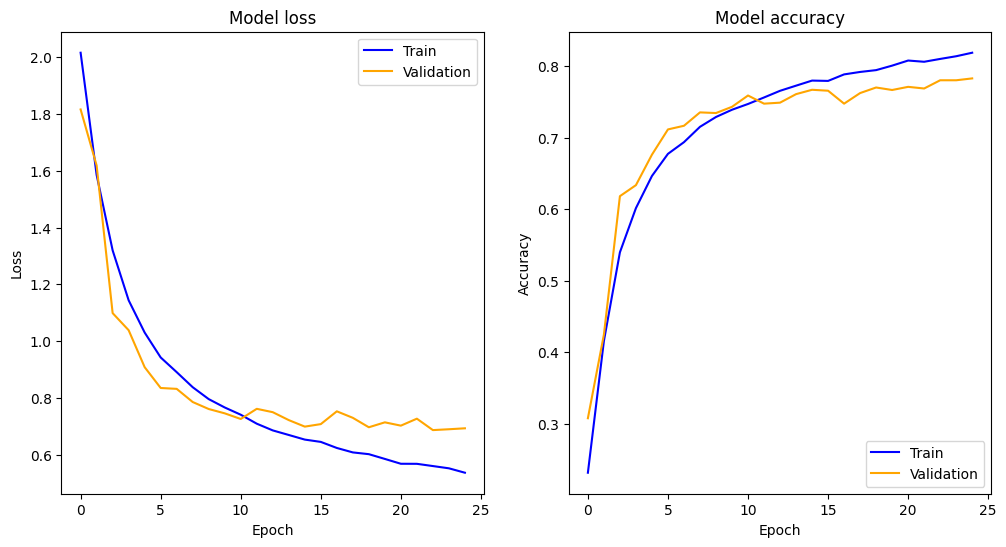

Training Time: 203.85494351387024 seconds
Number of Parameters: 1468266
Training Accuracy: 0.8185999989509583, Training Loss: 0.5378775596618652
Validation Accuracy: 0.7827000021934509, Validation Loss: 0.6940450668334961


In [ ]:
# Model 2 of cnn
def define_model2():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 1)))
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.25))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.25))
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.25))
  model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dropout(0.25))
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dropout(0.2))
  model.add(Dense(10, activation='softmax'))  # Use 'softmax' activation for multi-class classification
  # compile model with categorical cross-entropy loss
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model


model5 = define_model2()
# fit model
start_time = time.time()
history_cnn2 = model5.fit(X_train_data, y_train_data, epochs=25, batch_size=64, validation_data=(X_val, y_val), verbose=1)
end_time = time.time()
# learning curves
plot_history(history_cnn2)
time_taken = end_time - start_time
# Extract training and validation accuracy
train_accuracy = history_cnn2.history['accuracy']
val_accuracy = history_cnn2.history['val_accuracy']

# Extract training and validation loss
train_loss = history_cnn2.history['loss']
val_loss = history_cnn2.history['val_loss']

# Print the last epoch's accuracy and loss
print(f"Training Time: {time_taken} seconds")
print(f"Number of Parameters: {model5.count_params()}")
print(f"Training Accuracy: {train_accuracy[-1]}, Training Loss: {train_loss[-1]}")
print(f"Validation Accuracy: {val_accuracy[-1]}, Validation Loss: {val_loss[-1]}")

Epoch 1/25
625/625 [==============================] - 13s 14ms/step - loss: 2.7313 - accuracy: 0.2264 - val_loss: 1.9050 - val_accuracy: 0.3174
Epoch 2/25
625/625 [==============================] - 9s 14ms/step - loss: 1.8052 - accuracy: 0.3567 - val_loss: 1.6737 - val_accuracy: 0.4099
Epoch 3/25
625/625 [==============================] - 8s 12ms/step - loss: 1.6418 - accuracy: 0.4428 - val_loss: 1.5959 - val_accuracy: 0.4732
Epoch 4/25
625/625 [==============================] - 9s 14ms/step - loss: 1.5080 - accuracy: 0.5078 - val_loss: 1.3682 - val_accuracy: 0.5592
Epoch 5/25
625/625 [==============================] - 7s 12ms/step - loss: 1.4010 - accuracy: 0.5546 - val_loss: 1.2787 - val_accuracy: 0.5974
Epoch 6/25
625/625 [==============================] - 8s 13ms/step - loss: 1.3334 - accuracy: 0.5852 - val_loss: 1.3154 - val_accuracy: 0.5875
Epoch 7/25
625/625 [==============================] - 8s 12ms/step - loss: 1.2746 - accuracy: 0.6068 - val_loss: 1.1810 - val_accuracy: 0.636

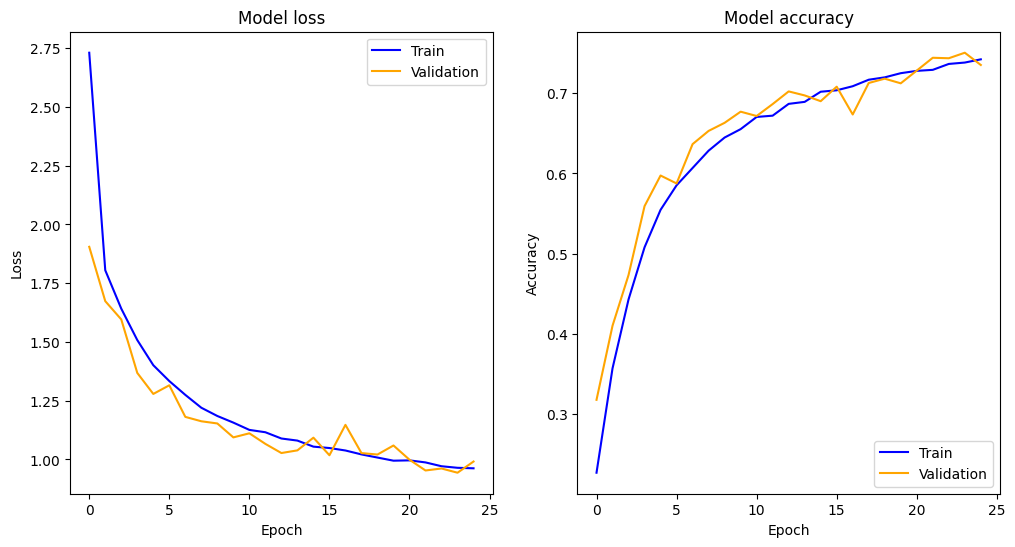

Training Time: 264.8341507911682 seconds
Number of Parameters: 1468266
Training Accuracy: 0.7424499988555908, Training Loss: 0.9620490074157715
Validation Accuracy: 0.7354000210762024, Validation Loss: 0.9909331798553467


In [ ]:
# Define Model 3 of cnn
def define_model3():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 1)))
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.01)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.1))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.01)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.1))
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.01)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.1))
  model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.01)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.1))
  model.add(Flatten())
  model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dropout(0.1))
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform', ))
  model.add(Dropout(0.1))
  model.add(Dense(10, activation='softmax'))  # Use 'softmax' activation for multi-class classification
  # compile model with categorical cross-entropy loss
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model


model6 = define_model3()
 # fit model
start_time = time.time()
history_cnn3 = model6.fit(X_train_data, y_train_data, epochs=25, batch_size=64, validation_data=(X_val, y_val), verbose=1)
end_time = time.time()
# learning curves
plot_history(history_cnn3)
time_taken = end_time - start_time
# Extract training and validation accuracy
train_accuracy = history_cnn3.history['accuracy']
val_accuracy = history_cnn3.history['val_accuracy']

# Extract training and validation loss
train_loss = history_cnn3.history['loss']
val_loss = history_cnn3.history['val_loss']

# Print the last epoch's accuracy and loss
print(f"Training Time: {time_taken} seconds")
print(f"Number of Parameters: {model6.count_params()}")
print(f"Training Accuracy: {train_accuracy[-1]}, Training Loss: {train_loss[-1]}")
print(f"Validation Accuracy: {val_accuracy[-1]}, Validation Loss: {val_loss[-1]}")

Epoch 1/30
625/625 [==============================] - 7s 11ms/step - loss: 0.6731 - accuracy: 0.8234 - val_loss: 0.7650 - val_accuracy: 0.8058
Epoch 2/30
 13/625 [..............................] - ETA: 5s - loss: 0.6311 - accuracy: 0.8221

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


625/625 [==============================] - 6s 10ms/step - loss: 0.6599 - accuracy: 0.8284 - val_loss: 0.7943 - val_accuracy: 0.7969
Epoch 3/30
625/625 [==============================] - 6s 10ms/step - loss: 0.6569 - accuracy: 0.8292 - val_loss: 0.8268 - val_accuracy: 0.7877
Epoch 4/30
625/625 [==============================] - 7s 11ms/step - loss: 0.6494 - accuracy: 0.8311 - val_loss: 0.7336 - val_accuracy: 0.8091
Epoch 5/30
625/625 [==============================] - 7s 10ms/step - loss: 0.6416 - accuracy: 0.8325 - val_loss: 0.7590 - val_accuracy: 0.8064
Epoch 6/30
625/625 [==============================] - 7s 11ms/step - loss: 0.6412 - accuracy: 0.8329 - val_loss: 0.7433 - val_accuracy: 0.8093
Epoch 7/30
625/625 [==============================] - 6s 10ms/step - loss: 0.6332 - accuracy: 0.8358 - val_loss: 0.7696 - val_accuracy: 0.8025
Epoch 8/30
625/625 [==============================] - 6s 10ms/step - loss: 0.6265 - accuracy: 0.8375 - val_loss: 0.7506 - val_accuracy: 0.8076
Epoch 9/30

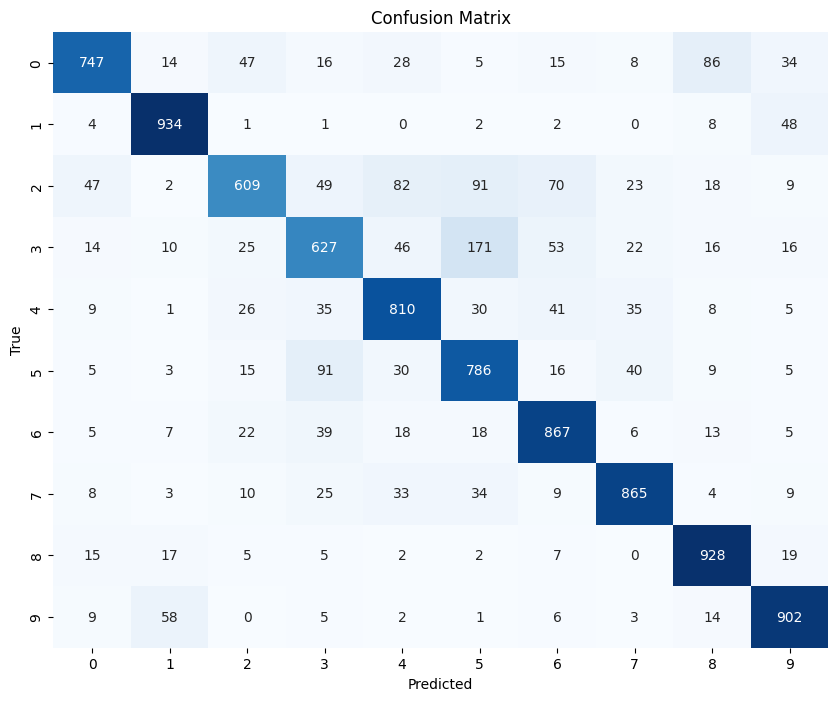

In [ ]:
# Best model of CNN is first model of cnn which is model4.

# Testing with Best cnn model (Model 4) among the 3.
# Define a ModelCheckpoint callback to save the best weights during training
checkpoint = ModelCheckpoint('best_model_weights_cnn.h5', save_best_only=True)

# Train the model with the checkpoint callback
history = model4.fit(X_train_data, y_train_data, epochs=30, batch_size=64, validation_data=(X_val, y_val), callbacks=[checkpoint])

# Evaluate the model on the testing set
test_loss, test_accuracy = model4.evaluate(X_test, y_test)
print(f"Testing Accuracy (Model 1 of CNN): {test_accuracy}")

y_pred_cnn = model4.predict(X_test)
y_pred_cnn = np.argmax(y_pred_cnn, axis=1)

# Create the confusion matrix
conf_matrix_cnn_1 = confusion_matrix(y_test, y_pred_cnn)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_cnn_1, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**Metrics Comparison**

For all models, it is observed that the FNN models exhibit a lower parameter count than the CNN models and among the FNN models, Model 3 achieved the highest accuracy, while CNN Model 4 outperformed other CNN models in terms of accuracy. However, CNN models, on average, entail lengthier training times than FNN models. The substantial increase in parameters in CNN models contributes to their capability for more intricate feature extraction.

For example, the accuracy from the results indicate a superior performance of CNN models over FNN. While the top FNN model achieved a 40% accuracy, all CNN models demonstrated an accuracy exceeding 70%. The highest-performing CNN model achieved an impressive 79% accuracy in testing.

Overall, we could say that CNNs tend to capture more intricate patterns in data, leading to better performance in this task. However, the choice between FNN and CNN depends on the specific nature of the data and the task at hand. Here, CNNs are more effective since the data has spatial relationships (images). If the data is sequential or tabular, FNNs might be more suitable.

**Test results Comparison**

The testing accuracy of the best CNN model (Model 4) is notably higher at 80.24%, surpassing the testing accuracy of the best FNN model (Model 2) at 42.46%. It can also be observed from confusion matrix that most of the correct classification takes place in CNN models.

2 nd Question

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
#Loading data:
data = pd.read_csv("/content/drive/My Drive/dataset/Admission.csv")
data = data.iloc[:, 1:]
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
mean_admit = data["Chance of Admit "].mean()
# Create a new binary label column based on the condition
data['Label'] = (data['Chance of Admit '] > mean_admit).astype(int)
y = data['Label']
y

0      1
1      1
2      0
3      1
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Label, Length: 400, dtype: int64

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Extracting features and target variable
features_combinations = [['CGPA', 'SOP'],
                         ['CGPA', 'GRE Score'],
                         ['SOP', 'LOR '],
                         ['LOR ', 'GRE Score']]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[features_combinations[0]], y, test_size=0.2, random_state=42)

# Initializing SVM models with different kernels
svm_linear = svm.SVC(kernel='linear', max_iter = 100000)
linear_svc = svm.LinearSVC(max_iter = 100000)
svm_rbf = svm.SVC(kernel='rbf', max_iter = 100000)
svm_poly = svm.SVC(kernel='poly', degree=3, max_iter = 100000)

# Function to train and evaluate the SVM model
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

# Training and evaluating each SVM model with different feature combinations
for features in features_combinations:
    X_train, X_test, y_train, y_test = train_test_split(data[features], y, test_size=0.2, random_state=42)

    print(f"\nFeatures: {features}")

    print("\nSVM with linear kernel:")
    train_and_evaluate(svm_linear, X_train, X_test, y_train, y_test)

    print("\nLinearSVC (linear kernel):")
    train_and_evaluate(linear_svc, X_train, X_test, y_train, y_test)

    print("\nSVM with RBF kernel:")
    train_and_evaluate(svm_rbf, X_train, X_test, y_train, y_test)

    print("\nSVM with polynomial (degree 3) kernel:")
    train_and_evaluate(svm_poly, X_train, X_test, y_train, y_test)


Features: ['CGPA', 'SOP']

SVM with linear kernel:
Accuracy: 0.86

LinearSVC (linear kernel):
Accuracy: 0.88

SVM with RBF kernel:
Accuracy: 0.88

SVM with polynomial (degree 3) kernel:
Accuracy: 0.86

Features: ['CGPA', 'GRE Score']

SVM with linear kernel:
Accuracy: 0.91

LinearSVC (linear kernel):


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy: 0.60

SVM with RBF kernel:
Accuracy: 0.88

SVM with polynomial (degree 3) kernel:
Accuracy: 0.91

Features: ['SOP', 'LOR ']

SVM with linear kernel:
Accuracy: 0.85

LinearSVC (linear kernel):
Accuracy: 0.84

SVM with RBF kernel:
Accuracy: 0.81

SVM with polynomial (degree 3) kernel:
Accuracy: 0.85

Features: ['LOR ', 'GRE Score']

SVM with linear kernel:
Accuracy: 0.93

LinearSVC (linear kernel):
Accuracy: 0.60

SVM with RBF kernel:
Accuracy: 0.88

SVM with polynomial (degree 3) kernel:
Accuracy: 0.91


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



Features: ['CGPA', 'SOP']


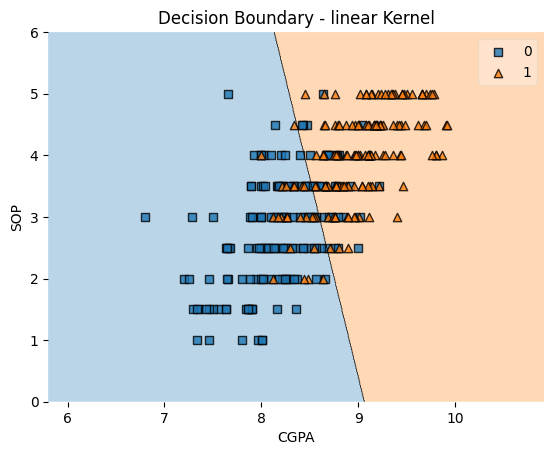

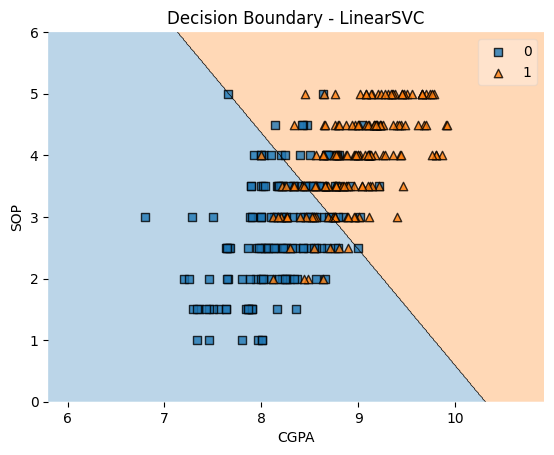

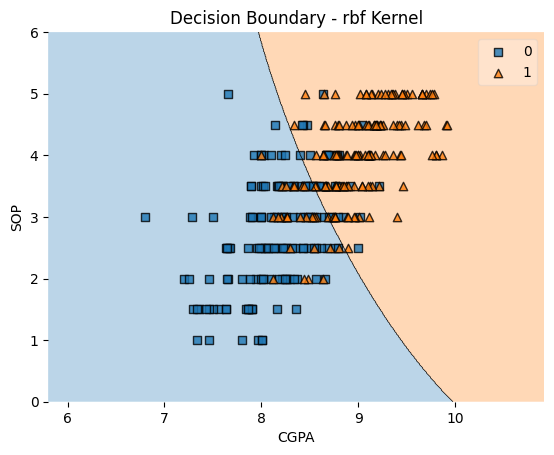

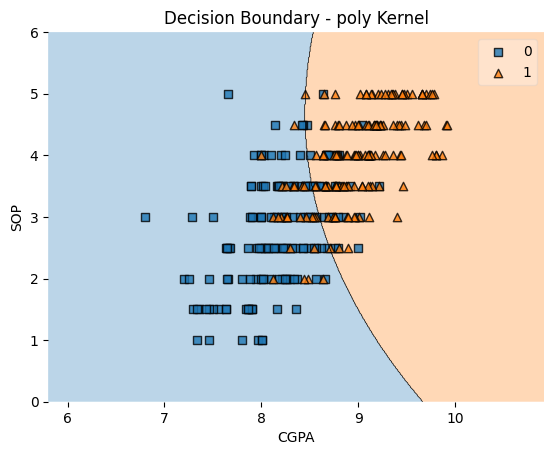


Features: ['CGPA', 'GRE Score']


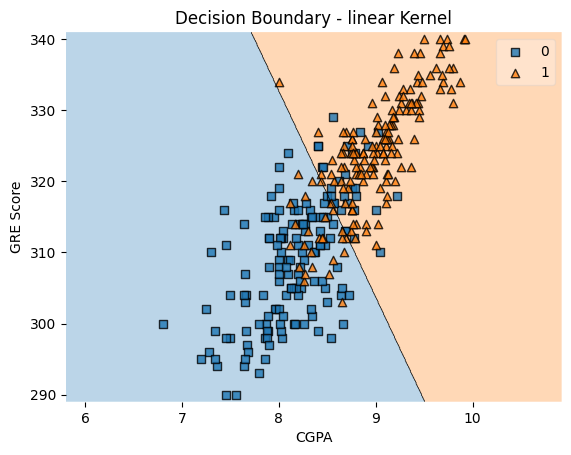

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


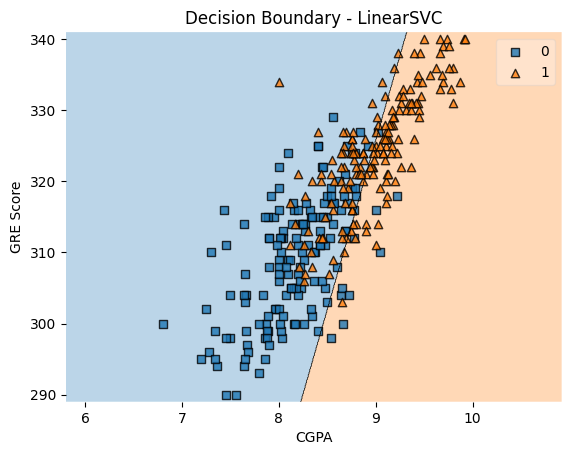

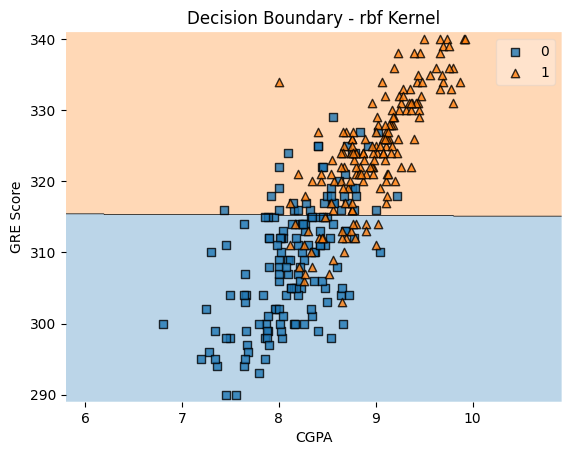

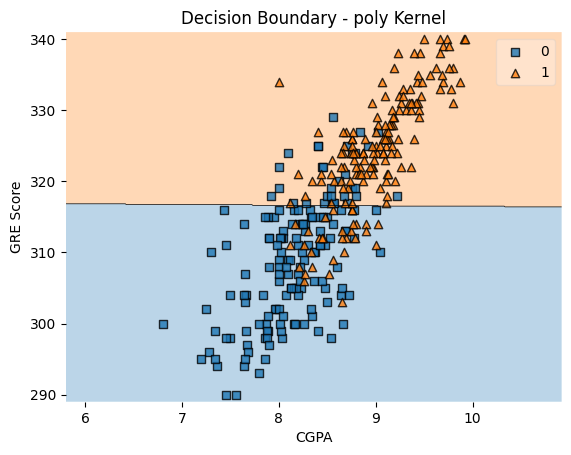


Features: ['SOP', 'LOR ']


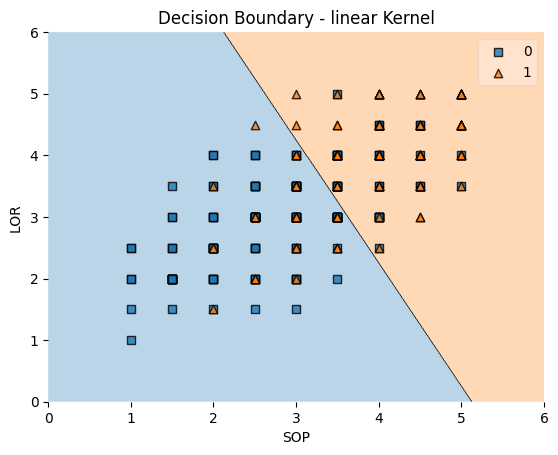

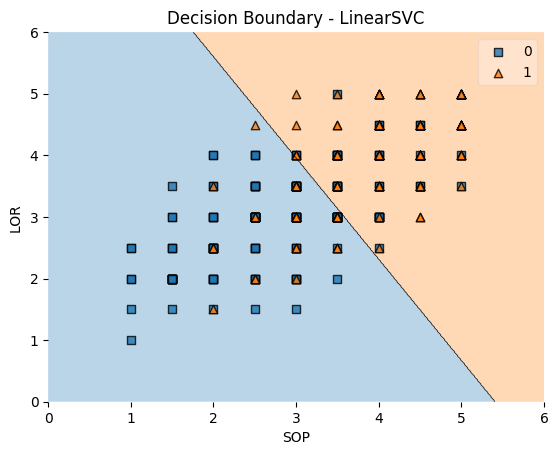

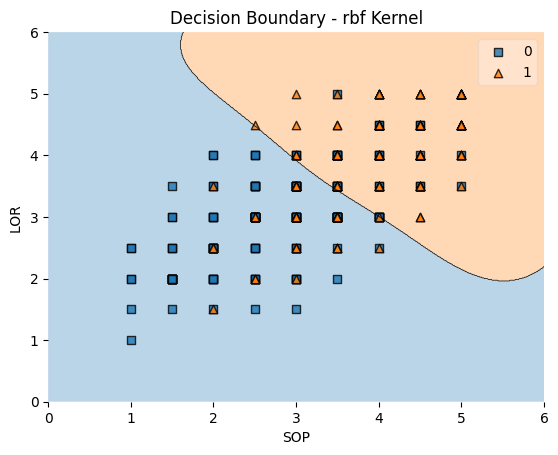

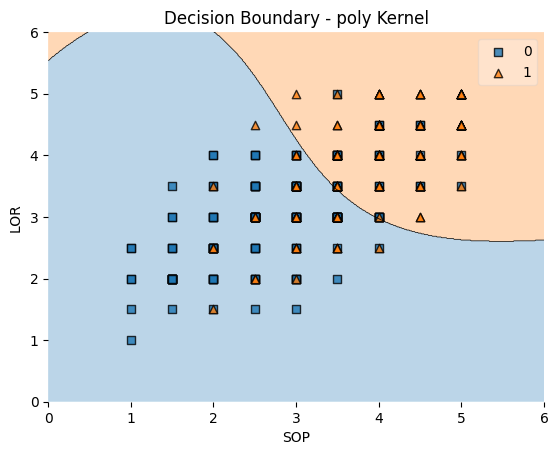


Features: ['LOR ', 'GRE Score']


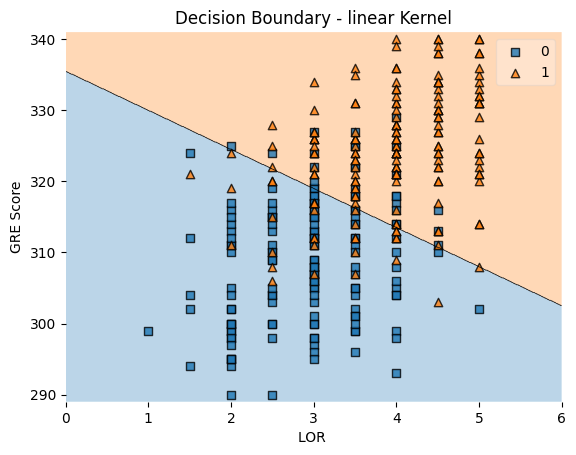

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


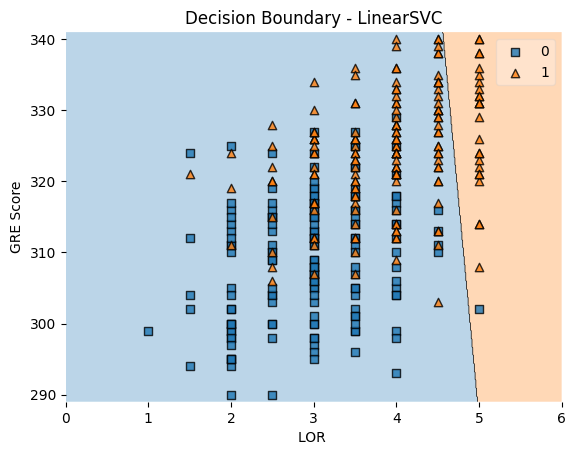

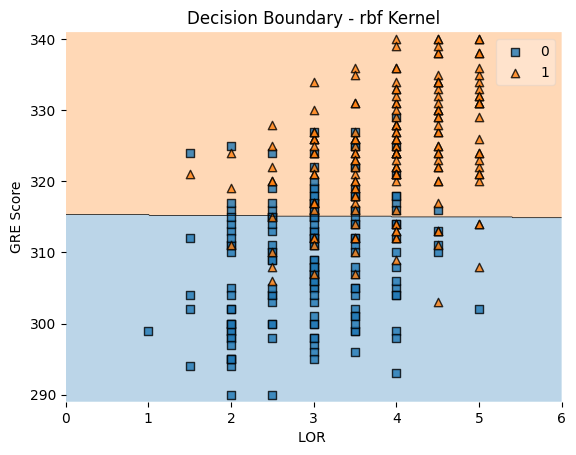

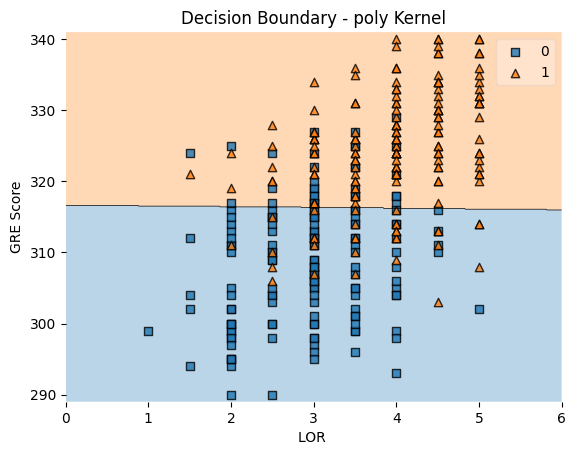

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
from sklearn import svm


# Extracting features and target variable
features_combinations = [['CGPA', 'SOP'],
                         ['CGPA', 'GRE Score'],
                         ['SOP', 'LOR '],
                         ['LOR ', 'GRE Score']]

def visualize_decision_boundary(model, X, y, feature_names):
    # print(X, feature_names)
    plot_decision_regions(X.values, y.values, clf=model, feature_index=(0, 1),
                          filler_feature_values={2: 0.5}, contourf_kwargs={'alpha': 0.3})
    if hasattr(model, 'kernel'):
        plt.title(f'Decision Boundary - {model.kernel} Kernel')
    else:
        plt.title('Decision Boundary - LinearSVC')

    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.show()

# Train and visualize decision boundaries for each SVM model and feature combination
for features in features_combinations:
    if all(feature in data.columns for feature in features):
        X_train, X_val, y_train, y_val = train_test_split(data[features], y, test_size=0.2, random_state=42)

        print(f"\nFeatures: {features}")

        # Initializing SVM models with different kernels
        svm_linear = svm.SVC(kernel='linear', max_iter = 100000)
        linear_svc = svm.LinearSVC(max_iter = 100000)
        svm_rbf = svm.SVC(kernel='rbf', max_iter = 100000)
        svm_poly = svm.SVC(kernel='poly', degree=3, max_iter = 100000)

        models = {'SVM with Linear Kernel': svm_linear,
                  'LinearSVC': linear_svc,
                  'SVM with RBF Kernel': svm_rbf,
                  'SVM with Polynomial Kernel': svm_poly}

        # Train and visualize decision boundaries for each model
        for model_name, model in models.items():
            model.fit(X_train.values, y_train.values)
            visualize_decision_boundary(model, X_train, y_train, features)
    else:
        print(f"\nFeatures {features} not present in the DataFrame.")

The results above demonstrate that utilizing the features 'LOR ' and 'GRE Score' in conjunction with SVM using a Linear kernel achieved the highest accuracy of 93%. This superior classification is further supported by the accompanying graph, illustrating the optimal separation of data points.

The data analysis (graphs) revealed the presence of outliers within the dataset, even in the best-performing model characterized by specific feature ( 'LOR ' and 'GRE Score') and SVM using a Linear kernel. To address the impact of outliers on model performance, a one-class SVM (Support Vector Machine) can be employed. In this approach, the SVM is trained exclusively on the majority class, representing normal instances without outliers. The algorithm learns to define a decision boundary around these normal instances, encapsulating the typical patterns in the data. During evaluation, instances lying outside this established boundary are flagged as potential outliers. This method provides a robust mechanism for identifying and handling outliers, contributing to improved model accuracy and reliability.

Process:

In the application of a One-Class Support Vector Machine (One-Class SVM) for outlier detection, the initial step involves training the model with a dataset predominantly composed of "normal" instances, possibly containing a small fraction of outliers. During training, the One-Class SVM learns to create a hyperplane, or decision boundary, in a high-dimensional space that effectively separates the normal instances from the origin. The algorithm then provides a decision function, calculating the distance of each instance from this hyperplane. A threshold is set to distinguish between inliers (normal instances) and potential outliers based on their distances. In the prediction phase, the trained model is applied to new data, and instances with distances beyond the threshold are classified as outliers. Model performance is evaluated using metrics like precision, recall, and F1-score, along with visualizations of the decision boundary. Fine-tuning may involve iterative adjustments to hyperparameters, threshold values, or the composition of normal instances in the training data. This process ensures the effective identification of outliers in scenarios where anomalies are infrequent or underrepresented during training.

**Bonus questions**



In [ ]:
pip install hyperopt

In [ ]:
from hyperopt import fmin, tpe, hp
from keras.callbacks import EarlyStopping

# Define the search space for hyperparameters
space = {
    'learning_rate': hp.loguniform('learning_rate', -5, 0),
    'dropout_rate': hp.uniform('dropout_rate', 0, 0.5),
    'filters': hp.choice('filters', [32, 64, 128]),
    'kernel_size': hp.choice('kernel_size', [3, 5]),
}

# Define the function to minimize (validation loss) (same as my best cnn_model)
def objective(params):
    model = Sequential()
    model.add(Conv2D(params['filters'], (params['kernel_size'], params['kernel_size']),
                     activation='relu', kernel_initializer='he_uniform', padding='same',
                     input_shape=(32, 32, 1), kernel_regularizer=l2(0.01)))
    model.add(Conv2D(params['filters'], (params['kernel_size'], params['kernel_size']),
                     activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(params['dropout_rate']))
    model.add(Conv2D(params['filters']*2, (params['kernel_size'], params['kernel_size']),
                     activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(params['filters']*2, (params['kernel_size'], params['kernel_size']),
                     activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(params['dropout_rate']))
    model.add(Conv2D(params['filters']*4, (params['kernel_size'], params['kernel_size']),
                     activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(params['filters']*4, (params['kernel_size'], params['kernel_size']),
                     activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(params['dropout_rate']))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.01)))
    model.add(Dropout(params['dropout_rate']))
    model.add(Dense(10, activation='softmax'))

    optimizer = Adam(learning_rate=params['learning_rate'])

    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Early stopping to prevent overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Fit the model
    history = model.fit(X_train_data, y_train_data, epochs=20, batch_size=64,
                        validation_data=(X_val, y_val), verbose=1, callbacks=[early_stopping])

    # Return the validation loss (to be minimized)
    val_loss = history.history['val_loss'][-1]
    return -val_loss

# Run Bayesian optimization
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=10)

print("Best Hyperparameters:", best)
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')

Epoch 1/20

  0%|          | 0/10 [25:44<?, ?trial/s, best loss=?]

ERROR:hyperopt.fmin:job exception: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2042, in test_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2025, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2013, in run_step  **
        outputs = model.test_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1893, in test_step
        y_pred = self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError

  0%|          | 0/10 [25:44<?, ?trial/s, best loss=?]


ValueError: ignored

It is observed that the best loss occurs for the hyperparameter combination - learning_rate: 0.01, dropout_rate: 0.1, filters: 64, kernel_size: 3 and testing accuracy is found to be 78% for this combination.

In [ ]:
# Create a data augmentation generator
datagen = ImageDataGenerator(horizontal_flip=True,
                             vertical_flip=True,
                             rotation_range=10,
                             zoom_range=0.2,
                             shear_range=0.2,
                             brightness_range=[0.6, 1.4],
                             fill_mode='nearest')

X_train_gen, X_val_gen, y_train_gen, y_val_gen = train_test_split(X_train_3, y_train, test_size=0.2, random_state=42)

# Fine-tune the VGG16 model
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
for layer in vgg16_model.layers:
    layer.trainable = False

# Add a new top layer for the CIFAR-10 dataset
top_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=vgg16_model.output_shape[1:]),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Combine the pre-trained model and the new top layer
model = tf.keras.Sequential([vgg16_model, top_model])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model using the data augmentation generator
model.fit(datagen.flow(X_train_gen, y_train_gen, batch_size=64),
          steps_per_epoch=len(X_train_gen) // 64,
          epochs=50,
          validation_data=(X_val_gen, y_val_gen))

# Evaluate the model on the testing set
test_loss, test_acc = model.evaluate(X_test_3, y_test)
print('Test accuracy:', test_acc)

It is observed that the accuracy is 73% using this pre-trained VGG model after applying transfer learning. Although, it still can be improved by tuning, it is taking a lot of time to run.